<a href="https://colab.research.google.com/github/nxxk23/AI-Engineer/blob/main/xlm_architect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install matplotlib networkx imageio graphviz

In [2]:
from transformers import XLMRobertaModel, XLMRobertaConfig, XLMRobertaForSequenceClassification

# Load the configuration and model
config = XLMRobertaConfig.from_pretrained("xlm-roberta-base")
model = XLMRobertaForSequenceClassification.from_pretrained("xlm-roberta-base")

# Print the model architecture
print(model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768,

In [3]:
from graphviz import Digraph

def create_horizontal_diagram():
    dot = Digraph(format='png', graph_attr={'rankdir': 'LR', 'splines': 'ortho'})

    # Define nodes with rectangular shape
    dot.node('Input', 'Input', shape='rect')
    dot.node('Embeddings', 'Embeddings', shape='rect')
    dot.node('Encoder', 'Encoder (12 Layers)', shape='rect')
    dot.node('Pooler', 'Pooler', shape='rect')
    dot.node('Output', 'Output', shape='rect')

    # Define layers in encoder
    dot.node('Attention', 'Self-Attention Layer', shape='rect')
    dot.node('Intermediate', 'Intermediate Layer', shape='rect')
    dot.node('OutputLayer', 'Output Layer', shape='rect')

    # Create edges between main components
    dot.edge('Input', 'Embeddings', label='Token & Positional Embeddings')
    dot.edge('Embeddings', 'Encoder', label='Input Embeddings')
    dot.edge('Encoder', 'Pooler', label='Hidden States')
    dot.edge('Pooler', 'Output', label='Pooled Output')

    # Create edges within the encoder layers
    dot.edge('Encoder', 'Attention', label='Layer 1')
    dot.edge('Attention', 'Intermediate', label='Attention Mechanism')
    dot.edge('Intermediate', 'OutputLayer', label='Intermediate Transformation')
    dot.edge('OutputLayer', 'Attention', label='Layer 2')

    # Render the diagram
    dot.render('xlm_roberta_architecture')

create_horizontal_diagram()


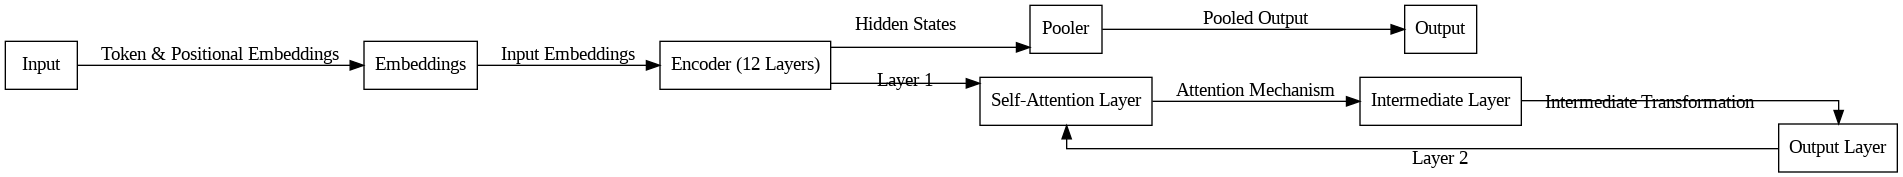

In [4]:
from graphviz import Digraph

def create_xlm_roberta_diagram():
    # Create a new directed graph
    dot = Digraph(format='png', graph_attr={'rankdir': 'LR', 'splines': 'ortho'})

    # Define nodes with rectangular shape
    dot.node('Input', 'Input', shape='rect')
    dot.node('Embeddings', 'Embeddings', shape='rect')
    dot.node('Encoder', 'Encoder (12 Layers)', shape='rect')
    dot.node('Pooler', 'Pooler', shape='rect')
    dot.node('Output', 'Output', shape='rect')

    # Define layers within the encoder
    dot.node('Attention', 'Self-Attention Layer', shape='rect')
    dot.node('Intermediate', 'Intermediate Layer', shape='rect')
    dot.node('OutputLayer', 'Output Layer', shape='rect')

    # Define classification head components
    dot.node('Classifier', 'Classifier Head', shape='rect')
    dot.node('Dense1', 'Dense Layer', shape='rect')
    dot.node('Dropout', 'Dropout', shape='rect')
    dot.node('Dense2', 'Output Layer', shape='rect')

    # Create edges between main components
    dot.edge('Input', 'Embeddings', label='Token & Positional Embeddings')
    dot.edge('Embeddings', 'Encoder', label='Input Embeddings')
    dot.edge('Encoder', 'Pooler', label='Hidden States')
    dot.edge('Pooler', 'Output', label='Pooled Output')

    # Encoder layer details
    dot.edge('Encoder', 'Attention', label='Layer 1')
    dot.edge('Attention', 'Intermediate', label='Attention Mechanism')
    dot.edge('Intermediate', 'OutputLayer', label='Intermediate Transformation')
    dot.edge('OutputLayer', 'Attention', label='Layer 2')

    # Classification head
    dot.edge('Output', 'Classifier', label='Encoded Representations')
    dot.edge('Classifier', 'Dense1', label='Dense Layer')
    dot.edge('Dense1', 'Dropout', label='Dropout')
    dot.edge('Dropout', 'Dense2', label='Final Classification Layer')

    # Render the diagram
    dot.render('xlm_roberta_for_sequence_classification', format='png')

create_xlm_roberta_diagram()


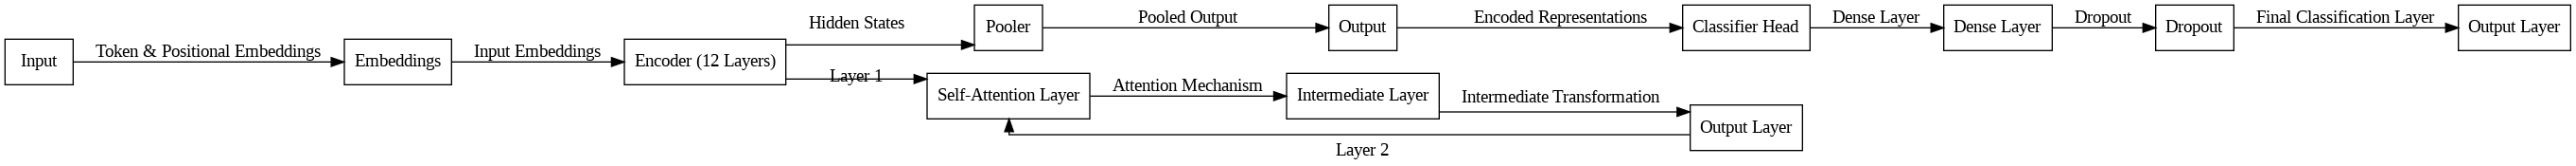